In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_path = '/kaggle/input/braintumor/Training'
test_path = '/kaggle/input/braintumor/Testing'

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten

In [7]:
base_model = VGG16(include_top=False,input_shape=(224,224,3),weights='imagenet')

2022-11-26 17:57:22.961387: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 17:57:23.058727: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 17:57:23.059631: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 17:57:23.061336: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step


In [8]:
for layer in base_model.layers:
    layer.trainable=False

In [9]:
flatten_layer = Flatten()(base_model.output)

In [10]:
dense_layer_1 = Dense(256,activation='relu')(flatten_layer)
dense_layer_2 = Dense(128,activation='relu')(dense_layer_1)

In [11]:
prediction_layer = Dense(4,activation='softmax')(dense_layer_2)

In [12]:
model = Model(inputs=base_model.input,outputs=prediction_layer)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
train_img_gen = ImageDataGenerator(rescale=1./255,horizontal_flip=True)

In [16]:
train_images = train_img_gen.flow_from_directory(train_path,batch_size=32,shuffle=True,
                                                target_size=(224,224),class_mode='categorical')

Found 5712 images belonging to 4 classes.


In [17]:
test_img_gen = ImageDataGenerator(rescale=1./255)

In [18]:
test_images = test_img_gen.flow_from_directory(test_path,batch_size=1,shuffle=True,
                                              target_size=(224,224),class_mode='categorical')

Found 1311 images belonging to 4 classes.


In [19]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [20]:
model.fit(train_images,epochs=10,steps_per_epoch=len(train_images),
         validation_data = test_images, callbacks=[early_stop])

2022-11-26 17:58:09.492464: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-11-26 17:58:11.665261: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


179/179 [==============================] - 65s 308ms/step - loss: 0.4914 - accuracy: 0.8305 - val_loss: 0.3791 - val_accuracy: 0.8436
Epoch 2/10
179/179 [==============================] - 32s 180ms/step - loss: 0.2054 - accuracy: 0.9249 - val_loss: 0.1838 - val_accuracy: 0.9291
Epoch 3/10
179/179 [==============================] - 35s 194ms/step - loss: 0.1473 - accuracy: 0.9410 - val_loss: 0.1496 - val_accuracy: 0.9375
Epoch 4/10
179/179 [==============================] - 34s 191ms/step - loss: 0.1154 - accuracy: 0.9582 - val_loss: 0.1551 - val_accuracy: 0.9405
Epoch 5/10
179/179 [==============================] - 33s 183ms/step - loss: 0.0910 - accuracy: 0.9664 - val_loss: 0.1095 - val_accuracy: 0.9580
Epoch 6/10
179/179 [==============================] - 33s 184ms/step - loss: 0.0816 - accuracy: 0.9729 - val_loss: 0.0872 - val_accuracy: 0.9687
Epoch 7/10
179/179 [==============================] - 33s 183ms/step - loss: 0.0692 - accuracy: 0.9729 - val_loss: 1.0511 - val_accuracy: 0.7

In [21]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

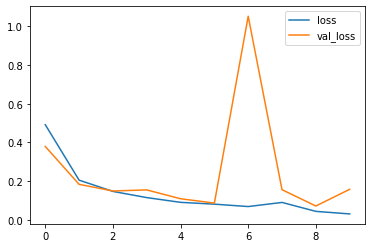

In [22]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

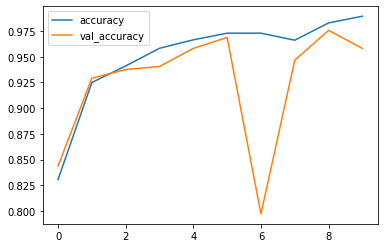

In [23]:
losses[['accuracy','val_accuracy']].plot()

In [24]:
predictions = model.predict(test_images)

In [25]:
predictions.shape

(1311, 4)

In [26]:
predictions

array([[9.9708384e-01, 1.0272199e-06, 2.0462194e-07, 2.9148285e-03],
       [9.9999857e-01, 7.5557659e-07, 4.9223335e-08, 6.9706948e-07],
       [9.9993062e-01, 4.0356404e-05, 6.0334351e-06, 2.2972688e-05],
       ...,
       [5.3459588e-02, 9.4500691e-01, 1.5421221e-05, 1.5181531e-03],
       [3.9956944e-08, 6.8051614e-10, 2.5023537e-09, 1.0000000e+00],
       [1.0910543e-05, 9.9949110e-01, 4.9703935e-04, 8.4889786e-07]],
      dtype=float32)

In [27]:
model.evaluate(test_images)

1311/1311 [==============================] - 10s 7ms/step - loss: 0.1582 - accuracy: 0.9580


[0.1581987589597702, 0.9580472707748413]